# **Массивы и связанные структуры данных**

Термины структура данных и конкретный тип данных относятся к внутреннему представлению
данных коллекции. Две структуры данных, наиболее часто используемые для реализации коллекций в
языках программирования, - это массивы и связанные структуры. Эти два типа структур
используют разные подходы к хранению данных в памяти компьютера и доступу к ним. Эти
подходы, в свою очередь, приводят к различным пространственно-временным компромиссам в алгоритмах, которые манипулируют
коллекциями. В этой главе рассматривается организация данных и конкретные детали
обработки, характерные для массивов и связанных структур. Их использование при реализации
различных типов коллекций обсуждается в последующих главах.

## **Структура данных массив**

Массив представляет собой последовательность элементов, к которым можно получить доступ или заменить их в заданных
позициях индекса. Вы, вероятно, думаете, что это описание напоминает описание списка Python. На
самом деле структура данных, лежащая в основе списка Python, является массивом. Хотя программисты на Python
обычно используют список там, где вы могли бы использовать массив, массив, а не список, является
основной реализующей структурой в коллекциях Python и многих других
языках программирования. Следовательно, вам необходимо ознакомиться с мышлением, основанным на массивах.

Модуль array в Python действительно включает класс array, который ведет себя больше как список, но
ограничен хранением чисел. Для целей последующего обсуждения вы определите
новый класс с именем Array, который придерживается ограничений, упомянутых ранее, но может
содержать элементы любого типа. По иронии судьбы, этот класс Array использует список Python для хранения своих элементов.
Класс определяет методы, которые позволяют клиентам использовать оператор подстрочного индекса [], функцию длины
, функцию str и цикл for с объектами array. Методы Array
необходимые для этих операций данные перечислены в таблице 4-1. Переменная a в левом столбце
ссылается на объект массива.

Когда Python сталкивается с операцией в левом столбце таблицы 4-1, он автоматически вызывает
соответствующий метод в правом столбце с объектом Array. Например, Python
автоматически вызывает метод __iter__ объекта Array при обходе объекта Array
в цикле for. Обратите внимание, что программист должен указать емкость или физический размер
массива при его создании. Значение заполнения по умолчанию, None, может быть переопределено, чтобы при желании предоставить другое
значение заполнения.

Вот код для класса Array (в arrays.py):

In [1]:
"""
File: arrays.py
An Array is like a list, but the client can use
only [], len, iter, and str.
To instantiate, use
<variable> = Array(<capacity>, <optional fill value>)
The fill value is None by default.
"""

class Array(object):
    """Represents an array."""

    def __init__(self, capacity, fillValue = None):
        """Capacity is the static size of the array.
        fillValue is placed at each position."""
        self.items = list()
        for count in range(capacity):
            self.items.append(fillValue)

    def __len__(self):
        """-> The capacity of the array."""
        return len(self.items)

    def __str__(self):
        """-> The string representation of the array."""
        return str(self.items)

    def __iter__(self):
        """Supports traversal with a for loop."""
        return iter(self.items)

    def __getitem__(self, index):
        """Subscript operator for access at index."""
        return self.items[index]

    def __setitem__(self, index, newItem):
        """Subscript operator for replacement at index."""
        self.items[index] = newItem

In [2]:
a = Array(5)
len(a)

5

In [3]:
print(a)

[None, None, None, None, None]


## **Произвольный доступ и непрерывная память**

Подстрочный индекс, или операция индексирования, позволяет программисту легко сохранять или извлекать
элемент в заданной позиции. Операция индексирования массива также выполняется очень быстро. Индексирование массива - это операция произвольного доступа. Во время произвольного доступа компьютер получает местоположение
i-го элемента, выполняя постоянное количество шагов. Таким образом, независимо от размера массива,
для доступа к первому элементу требуется столько же времени, сколько и для доступа к последнему элементу.

Компьютер поддерживает произвольный доступ к массивам, выделяя блок смежных
ячеек памяти для элементов массива. Один такой блок показан на рисунке 4-1.

Для простоты на рисунке предполагается, что каждый элемент данных занимает одну ячейку памяти,
хотя это не обязательно так. Адреса машин представляют собой 8-разрядные двоичные числа.

Поскольку адреса элементов расположены в числовой последовательности, адрес элемента массива может
быть вычислен путем сложения двух значений: базового адреса массива и смещения элемента. Базовый адрес - это машинный адрес первого элемента. Смещение элемента равно его индексу, умноженному на константу, представляющую количество ячеек памяти (в Python всегда 1), требуемое
для элемента массива. Подводя итог, операция индексирования в массиве Python состоит из двух этапов:
1. Извлеките базовый адрес блока памяти массива.
2. Верните результат добавления индекса к этому адресу.

#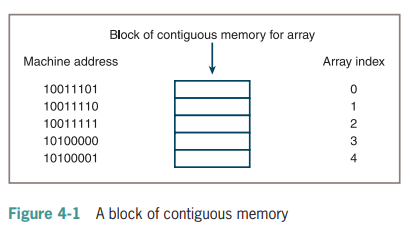

## **Статическая память и динамическая память**

Массивы в старых языках, таких как FORTRAN и Pascal, были статическими структурами данных.
Длина или емкость массива определялась во время компиляции, поэтому программисту необходимо
было указать этот размер с помощью константы. Поскольку программист не мог изменить длину
массива во время выполнения, ему нужно было предсказать, какой объем памяти массива потребуется всем приложениям программы. Если программа всегда ожидала известное фиксированное количество элементов в
массиве, проблем не возникало. Но в других случаях, в которых количество элементов данных варьировалось,
программистам приходилось запрашивать достаточно памяти, чтобы охватить случаи
, когда в массиве будет храниться наибольшее количество элементов данных. Очевидно, что это требование приводило к тому, что программы
тратили впустую память для многих приложений. Хуже того, когда количество элементов данных превышало
длину массива, лучшее, что могла сделать программа, - это вернуть сообщение об ошибке.

Современные языки, такие как Java и C++, обеспечивают решение этих проблем, позволяя
программисту создавать динамические массивы. Подобно статическому массиву, динамический массив занимает непрерывный
блок памяти и поддерживает произвольный доступ. Однако длина динамического массива
не обязательно должна быть известна до времени выполнения. Таким образом, программист на Java или C++ может указать длину
динамического массива во время создания экземпляра. Класс Python Array ведет себя аналогичным образом.

## **Физический размер и логический размер**

При работе с массивом программистам часто приходится различать его длину или
физический размер и его логический размер. Физический размер массива - это общее количество
ячеек массива или число, используемое для указания его емкости при создании массива. Логический размер
массива - это количество элементов в нем, которые в данный момент должны быть доступны приложению.
Когда массив всегда заполнен, программисту не нужно беспокоиться об этом различии.
Однако такие случаи редки.

## **Операции с массивами**

Сейчас ознакомимся с реализацией нескольких операций над массивами. Тип array еще
не предоставляет этих операций; программист, который использует array, должен их написать.
В этих примерах вы можете использовать следующие настройки данных:

In [4]:
DEFAULT_CAPACITY = 5
logicalSize = 0
a = Array(DEFAULT_CAPACITY)

Как можно заметить, начальный логический размер массива равен 0, а физический размер по умолчанию, или емкость, равен 5. Для каждой операции, использующей этот массив, вы прочтете описание стратегии реализации и аннотированный фрагмент кода на Python. Опять же, эти операции используются
для определения методов для коллекций, содержащих массивы.

## **Увеличение размера массива**

Когда вот-вот будет вставлен новый элемент и логический размер массива равен его физическому размеру,
пришло время увеличить размер массива. Тип списка в Python выполняет эту операцию во время вызова метода insert или append, когда требуется больше памяти для массива. Процесс
изменения размера состоит из трех шагов:

1. Создайте новый массив большего размера.

2. Скопируйте данные из старого массива в новый массив.

3. Переустановите старую переменную массива на новый объект массива.

Рассмотрим пример кода:

In [5]:
if logicalSize == len(a):
    temp = Array(len(a) + 1) # Create a new array
    for i in range(logicalSize): # Copy data from the old
        temp [i] = a[i] # array to the new array
    a = temp # Reset the old array variable
            # to the new array

Необходимо обратить внимание, что память старого массива оставлена для сборщика мусора. Вы также
естественным образом увеличиваете длину массива на одну ячейку, чтобы вместить каждый новый элемент.
Однако учтите последствия этого решения для производительности. При
изменении размера массива количество операций копирования является линейным.

## **Уменьшение размера массива**

Когда логический размер массива уменьшается, ячейки становятся ненужными. Когда элемент собирается быть
удаленным и количество этих неиспользуемых ячеек достигает или превышает определенный порог, скажем,
три четверти физического размера массива, пришло время уменьшить физический размер. Эта
операция выполняется в Python типа list всякий раз, когда метод pop приводит к потере памяти превышает определенный порог. Процесс уменьшения размера массива является обратным
его увеличению. Вот шаги:
1. Создайте новый массив меньшего размера.
2. Скопируйте данные из старого массива в новый массив.
3. Переустановите старую переменную массива на новый объект массива.

Код для этого процесса запускается, когда логический размер массива меньше или равен
одной четвертой его физического размера, а его физический размер как минимум вдвое превышает емкость по умолчанию,
установленную вами для массива. Алгоритм уменьшает физический размер массива до
половины его физического размера, при условии, что это не меньше его емкости по умолчанию. Вот
код:

In [6]:
if logicalSize <= len(a) // 4 and len(a) >= DEFAULT_CAPACITY * 2:
    temp = Array(len(a) // 2) # Create new array
    for i in range(logicalSize): # Copy data from old array
        temp [i] = a [i] # to new array
    a = temp # Reset old array variable to
    # new array

## **Вставка элемента в растущий массив**

Вставка элемента в массив отличается от замены элемента в массиве. В случае
замены элемент уже существует в заданной позиции индекса, и достаточно простого присвоения
этой позиции. Более того, логический размер массива не меняется. В случае
вставки программист должен выполнить четыре действия:

1. Проверьте наличие свободного места перед попыткой вставки и при необходимости увеличьте физический
размер массива, как описано ранее.
2. Переместите элементы из логического конца массива в целевую позицию индекса вниз
на единицу. Этот процесс открывает отверстие для нового элемента в целевом индексе.
3. Назначьте новому элементу позицию целевого индекса.
4. Увеличьте логический размер на единицу.
На рисунке 4-3 показаны эти шаги для вставки элемента D5 в позицию 1 в массив из
четырех элементов.

Как вы можно увидеть, порядок, в котором элементы смещены, имеет решающее значение. Если вы начнете с целевого
индекса и скопируете оттуда вниз, вы потеряете два элемента. Таким образом, вы должны начать с логического
конца массива и вернуться к целевому индексу, копируя каждый элемент в ячейку его
преемник. Вот код на Python для операции вставки:

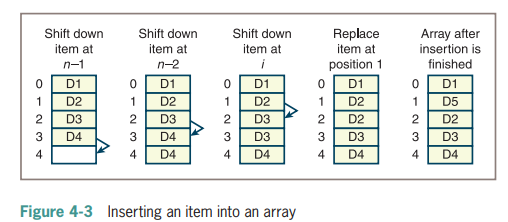

In [7]:
# Increase physical size of array if necessary
# Shift items down by one position
targetIndex = 2

for i in range(logicalSize, targetIndex, -1):
    a[i] = a[i - 1]

# Add new item and increment logical size
newItem = 0
a[targetIndex] = newItem
logicalSize += 1

## **Вставка элемента в растущий массив**

Вставка элемента в массив отличается от замены элемента в массиве. В случае
замены элемент уже существует в заданной позиции индекса, и достаточно простого присвоения
этой позиции. Более того, логический размер массива не меняется. В случае
вставки программист должен выполнить четыре действия:
1. Проверьте наличие свободного места перед попыткой вставки и при необходимости увеличьте физический
размер массива, как описано ранее.
2. Переместите элементы из логического конца массива в целевую позицию индекса вниз
на единицу. Этот процесс открывает отверстие для нового элемента в целевом индексе.
3. Назначьте новому элементу позицию целевого индекса.
4. Увеличьте логический размер на единицу.

In [8]:
# Increase physical size of array if necessary
# Shift items down by one position
for i in range(logicalSize, targetIndex, -1):
    a[i] = a[i - 1]

# Add new item and increment logical size
a[targetIndex] = newItem
logicalSize += 1


Время, затрачиваемое на перемещение элементов во время вставки, в среднем линейно, поэтому
операция вставки является линейной.

## **Удаление элемента из массива**

Удаление элемента из массива инвертирует процесс вставки элемента в массив.
Вот шаги в этом процессе:
1. Переместите элементы из позиции, следующей за целевым индексом, в логический конец
массива на единицу вверх. Этот процесс закрывает дыру, оставленную удаленным элементом в
целевом индексе.
2. Уменьшите логический размер на единицу.
3. Проверьте, нет ли пустого места, и при необходимости уменьшите физический размер массива.

Как и при вставках, порядок, в котором вы перемещаете элементы, имеет решающее значение. Для удаления вы начинаете
с элемента, следующего за целевой позицией, и продвигаетесь к логическому концу массива,
копируя каждый элемент в ячейку его предшественника. Вот код на Python для
операции удаления:

In [9]:
# Shift items up by one position
for i in range(targetIndex, logicalSize - 1):
    a[i] = a[i + 1]
# Decrement logical size
logicalSize -= 1
# Decrease size of array if necessary

Опять же, поскольку время, затрачиваемое на перемещение элементов, в среднем линейно,
время, затрачиваемое на операцию удаления, является линейным.

## **Двумерные массивы (сетки/Grid)**

Изученные до сих пор массивы могут представлять только простые последовательности элементов и называются
одномерными массивами. Для многих приложений более полезны двумерные массивы или сетки
. Таблица чисел, например, может быть реализована в виде двумерного массива.
На рис. 4-5 показана сетка с четырьмя строками и пятью столбцами.

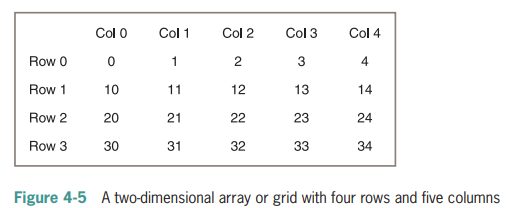

Предположим, что эта сетка называется grid. Чтобы получить доступ к элементу в grid, вы используете два нижних индекса для указания его позиций в строке и столбце, помня, что индексы начинаются с 0.

## **Определение класса Grid**

Класс Grid аналогичен классу Array, представленному ранее. Пользователи могут запускать методы для
определения количества строк и столбцов и получения строкового представления. Однако
итератор не предусмотрен. Сетка удобно представлена с помощью массива массивов.
Длина массива верхнего уровня равна количеству строк в таблице. Каждая ячейка в массиве верхнего уровня также является массивом. Длина этого массива равна количеству столбцов в таблице,
и этот массив содержит данные в данной строке. Метод __getitem__ - это все, что вам нужно
необходимо поддерживать использование клиентом двойного подстрочного индекса. Вот код для класса Grid:

In [10]:
class Grid(object):
    """Represents a two-dimensional array."""

    def __init__(self, rows, columns, fillValue = None):
        self.data = Array(rows)
        for row in range (rows):
            self.data[row] = Array(columns, fillValue)

    def getHeight(self):
        """Returns the number of rows."""
        return len(self.data)

    def getWidth(self):
        "Returns the number of columns."""
        return len(self.data[0])

    def __getitem__(self, index):
        """Supports two-dimensional indexing
        with [row][column]."""
        return self.data[index]

    def __str__(self):
        """Returns a string representation of the grid."""
        result = ""
        for row in range (self.getHeight()):
            for col in range (self.getWidth()):
                result += str(self.data[row][col]) + " "
            result += "\n"
        return result

## **Обработка и инициализация Grid**

В дополнение к двойному индексу сетка должна распознавать два метода, которые возвращают
количество строк и количество столбцов. Для целей обсуждения эти методы
называются getHeight и getWidth соответственно. Методы манипулирования одномерными массивами легко распространяются на сетки. Например, следующий сегмент кода
вычисляет сумму всех чисел в таблице переменных. Внешний цикл повторяется четыре
раза и перемещается вниз по строкам. Каждый раз, проходя через внешний цикл, внутренний цикл повторяется
пять раз и перемещается по столбцам в другой строке.

In [11]:
sum = 0
grid = Grid(4, 5, 0)

for row in range(grid.getHeight()): # Go through rows
    for column in range(grid.getWidth()): # Go through columns
        sum +=grid[row][column]

## **Связанные структуры данных**

После массивов связанные структуры, вероятно, являются наиболее часто используемыми структурами данных в
программах. Как и массив, связанная структура - это конкретный тип данных, который реализует множество
типов коллекций, включая списки. Подробное рассмотрение использования связанных структур в коллекциях, таких как списки и бинарные деревья, приводится далее в этой книге.
В этом разделе подробно рассматриваются несколько характеристик, которые программисты должны иметь в виду при использовании связанных
структур для реализации коллекций любого типа.

## **Односвязные структуры и двусвязные структуры**

Как следует из названия, связанная структура состоит из элементов, которые связаны с другими элементами.
Хотя возможно множество связей между элементами, двумя простейшими связанными структурами являются
односвязная структура и двусвязная структура.

Полезно рисовать диаграммы связанных структур, используя обозначения в виде прямоугольника и указателя.
На рисунке 4-6 используются эти обозначения для демонстрации примеров двух типов связанных структур.

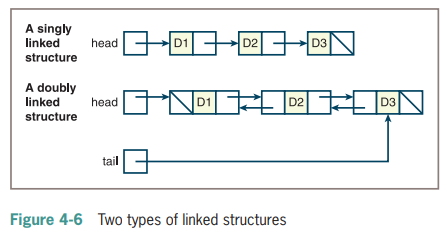

Пользователь односвязной структуры получает доступ к первому элементу, перейдя по единственной внешней
ссылке head. Затем пользователь получает доступ к другим элементам, связываясь по одиночным ссылкам (представленным стрелками на рисунке), которые исходят от элементов. Таким образом, в односвязной структуре легко добраться до преемника элемента, но не так просто добраться до предшественника
элемента.

## **Несмежная память и узлы**

Напомним, что элементы массива должны храниться в непрерывной памяти. Это означает, что логическая
последовательность элементов в массиве тесно связана с физической последовательностью ячеек в памяти.
Напротив, связанная структура отделяет логическую последовательность элементов в структуре от
любого упорядочения в памяти. То есть ячейку для данного элемента в связанной структуре можно найти
в любом месте памяти, пока компьютер может перейти по ссылке на ее адрес или местоположение.

Такая схема представления памяти называется несмежной памятью.
Базовой единицей представления в связанной структуре является узел. Односвязный узел содержит следующие компоненты или поля:

• Элемент данных

• Ссылка на следующий узел в структуре

В дополнение к этим компонентам двусвязный узел содержит ссылку на предыдущий узел
в структуре.

На рисунке 4-7 показаны односвязный узел и двусвязный узел, внутренние ссылки которого
пусты

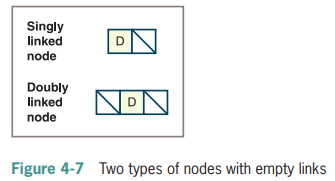

Другой массив содержал позиции индексов для соответствующих элементов в массиве данных
их последующих элементов в массиве данных. Таким образом, переход по ссылке означал использование
индекса элемента данных в первом массиве для доступа к значению во втором массиве, а затем использование этого
значения в качестве индекса для другого элемента данных в первом массиве. Пустая ссылка была представлена значением 21. На рисунке 4-8 показана связанная структура и ее представление в виде массива.
Как вы можете видеть, эта настройка эффективно отделяет логическое положение элемента данных в
связанной структуре от его физического положения в массиве.

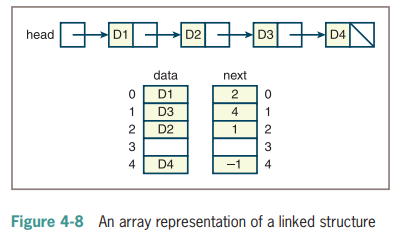

## **Определение односвязного класса узлов**

Классы узлов просты. Гибкость и простота использования имеют решающее значение, поэтому на переменные
экземпляра объекта node обычно ссылаются без вызовов методов, а конструкторы позволяют пользователю
устанавливать ссылки на узлы при создании узла. Как упоминалось ранее, односвязный узел
содержит только элемент данных и ссылку на следующий узел. Вот код для простого
односвязного класса узлов:

In [12]:
class Node(object):
    """Represents a singly linked node."""

    def __init__(self, data, next = None):
        """Instantiates a Node with a default next of None."""
        self.data = data
        self.next = next

## **Использование односвязного класса Node**

Node variables are initialized to either the None value or a new Node object. The next code
segment shows some variations on these two options:

In [13]:
# Just an empty link
node1 = None
# A node containing data and an empty link
node2 = Node("A", None)
# A node containing data and a link to node2
node3 = Node("B", node2)

В общем, вы можете защититься от исключений, спросив, является ли данная переменная узла
None, прежде чем пытаться получить доступ к ее полям:
if node Variable != None:

```
if nodeVariable != None:
 <access a field in nodeVariable>
```



Как и массивы, связанные структуры обрабатываются циклами. Вы можете использовать циклы для создания связанной
структуры и посещения каждого узла в ней. Следующий тестовый скрипт использует класс Node для создания односвязной структуры и печати ее содержимого:

In [14]:
"""
File: testnode.py
Tests the Node class.
"""
# from node import Node
head = None
# Add five nodes to the beginning of the linked structure
for count in range(1, 6):
    head = Node(count, head)
# Print the contents of the structure
while head != None:
    print(head.data)
    head = head.next

5
4
3
2
1


## **Операции с односвязными структурами**

Почти все операции с массивами уже основаны на индексах, поскольку индексы являются
неотъемлемой частью структуры массива. Программист должен эмулировать операции
на основе индексов в связанной структуре, манипулируя ссылками внутри структуры. В этом разделе рассматривается, как
эти манипуляции выполняются в обычных операциях, таких как обход, вставка
и удаление.

### **Обход**

Второй цикл в последней программе тестирования эффективно удалил каждый узел из связанной
структуры после печати данных этого узла. Однако многим приложениям просто необходимо посетить
каждый узел, не удаляя его. Эта операция, называемая обходом, использует временную
переменную указателя с именем probe. Эта переменная инициализируется указателем head связанной структуры и
затем управляет циклом следующим образом:

In [15]:
probe = head
while probe != None:
    # <use or modify probe.data>
    probe = probe.next

В общем, обход односвязной структуры посещает каждый узел и завершается при
достижении пустой ссылки. Таким образом, значение None служит сигналом, который останавливает процесс.

Обходы линейны по времени и не требуют дополнительной памяти.

### **Поиск**

В главе 3 “Поиск, сортировка и анализ сложности” обсуждался последовательный
поиск заданного элемента в списке. Последовательный поиск связанной структуры напоминает обход в
том смысле, что вы должны начать с первого узла и переходить по ссылкам, пока не дойдете до контрольного. Однако
в этом случае есть два возможных ориентира:

• Пустая ссылка, указывающая на то, что больше нет элементов данных для проверки

• Элемент данных, равный целевому элементу, указывающий на успешный поиск

Вот форма поиска для данного элемента:

In [16]:
probe = head
while probe != None and targetItem != probe.data:
    # probe = probe.next
    if probe != None:
        # <targetItem has been found >
        a = 1 + 1
    else:
        # <targetItem is not in the linked structure>
        a = 1 + 1


### **Замена**

Операции замены в односвязной структуре также используют шаблон обхода
. В этих случаях выполняется поиск заданного элемента или заданной позиции в связанной
структуре и замена элемента новым элементом. Первая операция, заменяющая данный
элемент, не обязательно предполагает, что целевой элемент находится в связанной структуре. Если целевой элемент
отсутствует, замена не происходит, и операция возвращает значение False. Если целевой
элемент присутствует, новый элемент заменяет его, и операция возвращает значение True. Вот форма
операции:

In [17]:
probe = head
while probe != None and targetItem != probe.data:
    probe = probe.next
if probe != None:
    probe.data = newItem
    # return True
else:
    # return False
    probe = newItem

## **Вставка в начале**

К настоящему времени вы, вероятно, задаетесь вопросом, существует ли операция над
связанной структурой, которая лучше линейной. На самом деле их несколько. В некоторых случаях эти операции могут сделать связанные
структуры предпочтительнее массивов. Первым таким случаем является вставка элемента в начало структуры. Это как раз то, что неоднократно выполнялось в программе тестирования
предыдущего раздела. Вот форма:

In [21]:
head = Node(newItem, head)

На рисунке 4-11 показана эта операция для двух случаев. В первом случае указатель head равен None, поэтому
в структуру вставляется первый элемент. Во втором случае второй элемент вставляется в
начало той же структуры.

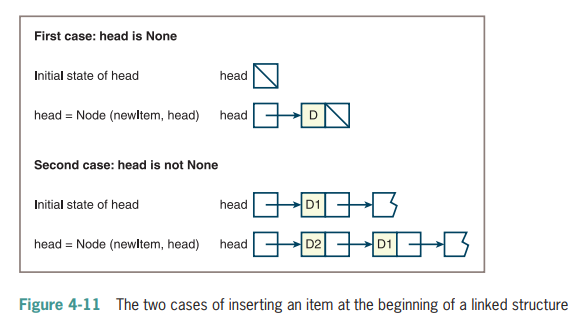

## **Inserting at the End**

Вставка элемента в конец массива (используется в операции добавления списка в Python)
требует постоянного времени и памяти, если только размер массива не должен быть изменен. Один и тот же процесс для
односвязной структуры должен учитывать два случая:

*   Указатель head равен None, поэтому указатель head установлен на новый узел.
*   Указатель head не равен None, поэтому код выполняет поиск последнего узла и
направляет свой следующий
указатель на новый узел.

Во втором случае вы возвращаетесь к шаблону обхода. Вот код:

In [22]:
newNode = Node(newItem)
if head is None:
    head = newNode
else:
    probe = head
    while probe.next != None:
        probe = probe.next
    probe.next = newNode

## **Удаление в начале**

В программе тестирования из предыдущего раздела вы неоднократно удаляли элемент в
начале связанной структуры. При выполнении операции такого типа обычно можно предположить, что
в структуре есть по крайней мере один узел. Операция возвращает удаленный элемент. Вот
код:

In [23]:
# Assumes at least one node in the structure
removedItem = head.data
head = head.next
# return removedItem

## **Удаление в конце**

Удаление элемента в конце массива (используется в методе pop списка Python) требует
постоянного времени и памяти, если только вам не нужно изменять размер массива. Тот же процесс для одной
связанной структуры предполагает наличие по крайней мере одного узла в структуре. Следует рассмотреть два случая:

*   Есть только один узел. Указателю head присвоено значение None.
*   Перед последним узлом есть узел. Код выполняет поиск этого предпоследнего узла и
устанавливает его следующий указатель равным None.

В любом случае код возвращает элемент данных, содержащийся в удаленном узле. Вот
форма:

In [24]:
# Assumes at least one node in structure
removedItem = head.data
if head.next is None:
    head = None
else:
    probe = head
    while probe.next.next != None:
        probe = probe.next
    removedItem = probe.next.data
    probe.next = None
# return removedItem

## **Вставка на любую позицию**

Вставка элемента в i–ю позицию массива требует перемещения элементов из позиции i вниз в позицию n - 1. Таким образом, вы фактически вставляете элемент перед элементом, находящимся в данный момент в
позиции i, так что новый элемент занимает позицию i, а старый элемент занимает позицию i 1 1.
Как насчет случаев с пустым массивом или индексом, который больше n – 1? Если массив
пуст, новый элемент помещается в начало, тогда как если индекс больше или равен
n, элемент помещается в конец.

Вставка элемента в i-ю позицию связанной структуры должна касаться тех же
случаев. В случае вставки в начале используется код, представленный ранее. Однако в случае
вставки в какую–либо другую позицию i операция должна сначала найти узел в
позиции i – 1 (если i , n) или узел в позиции n - 1 (если i .5 n). Тогда следует
рассмотреть два случая:

*   Следующий указатель этого узла равен None. Это означает, что i .5 n, поэтому вам следует поместить новый
элемент в конец связанной структуры.
*   Следующий указатель этого узла не равен None. Это означает, что 0 , i , n, поэтому вы должны поместить
новый элемент между узлом в позиции i – 1 и узлом в позиции i.



Как и при поиске i-го элемента, операция вставки должна подсчитывать узлы до тех
пор, пока не будет достигнута желаемая позиция. Однако, поскольку целевой индекс может быть больше или равен
количеству узлов, вы должны быть осторожны, чтобы не отклониться от конца связанной структуры
при поиске. Таким образом, цикл имеет дополнительное условие, которое проверяет следующий
указатель текущего узла, чтобы увидеть, является ли он конечным узлом. Вот форма:

In [25]:
if head is None or index <= 0:
    head = Node(newItem, head)
else:
# Search for node at position index - 1 or the last position
    probe = head
    while index > 1 and probe.next != None:
        probe = probe.next
        index -= 1
    # Insert new node after node at position index - 1
    # or last position
    probe.next = Node(newItem, probe.next)

## **Удаление на любой позииции**

Удаление i-го элемента из связанной структуры происходит в трех случаях:

*   i <= 0 — Вы используете код для удаления первого элемента.
*   0 < i < n — Вы выполняете поиск узла в позиции i – 1, как при вставке, и удаляете
следующий узел.
*   i > n — Вы удаляете последний узел.

Предположим, что в связанной структуре есть по крайней мере один элемент. Шаблон аналогичен
шаблону, используемому для вставки, в том смысле, что вы должны остерегаться выхода за пределы конца связанной структуры.
Однако вы должны разрешить указателю зонда перемещаться не дальше, чем на второй узел от
конца структуры. Вот форма:

In [26]:
# Assumes that the linked structure has at least one item
if index <= 0 or head.next is None:
    removedItem = head.data
    head = head.next
    # return removedItem
else:
    # Search for node at position index - 1 or
    # the next to last position
    probe = head
    while index > 1 and probe.next.next != None:
        probe = probe.next
        index -= 1
    removedItem = probe.next.data
    probe.next = probe.next.next
    # return removedItem

## **Компромисс между сложностью: Время, пространство и односвязные структуры**

Односвязные структуры представляют собой иной компромисс между пространством и временем, чем массивы. Таблица 4-3
содержит информацию о времени выполнения операций.
Удивительно, но этот подсчет показывает, что единственными двумя операциями связанной структуры, которые не являются линейными по времени, являются вставка и удаление первого элемента. Вам может быть интересно, почему
используется связанная структура вместо массива, если так много операций связанной структуры имеют
линейное поведение. Ну, предположим, вы хотите реализовать коллекцию, которая просто вставляет, получает доступ,
или удаляет первый элемент.

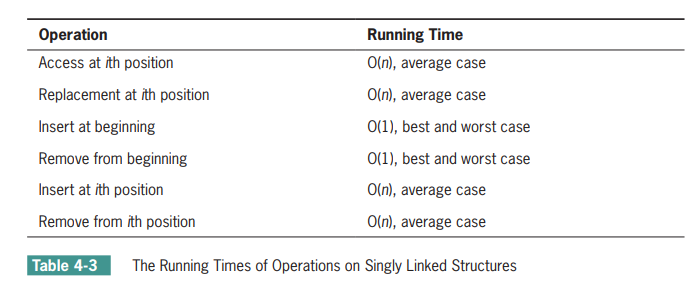

## **Варианты ссылки**

### **Циклически связанная структура с фиктивным узлом заголовка**

Вставка и удаление первого узла являются частными случаями операций insert ith и
remove для односвязных структур. Эти случаи являются особыми, поскольку
указатель head должен быть сброшен. Вы можете упростить эти операции, используя циклически
связанную структуру с фиктивным узлом header. Циклически связанная структура содержит ссылку
от последнего узла обратно к первому узлу в структуре. В этой реализации всегда есть по крайней мере один
узел. Этот узел, фиктивный узел заголовка, не содержит данных, но
служит маркером для начала и конца связанной структуры.

Поиск i-го узла начинается с узла, следующего за фиктивным узлом заголовка. Предположим
, что пустая связанная структура инициализирована следующим образом:

In [27]:
head = Node(None, None)
head.next = head

Вот код для вставок в i-ю позицию, использующий это новое представление связанной
структуры:

In [28]:
# Search for node at position index - 1 or the last position
probe = head
while index > 0 and probe.next != head:
    probe = probe.next
    index -= 1
# Insert new node after node at position index - 1 or
# last position
probe.next = Node(newItem, probe.next)

Преимущество этой реализации заключается в том, что операции вставки и удаления должны
учитывать только один случай — случай, в котором i-й узел находится между предыдущим узлом и
текущим i-м узлом. Когда i-й узел является первым узлом, предыдущий узел является узлом заголовка.
Когда i .5 n, последний узел является предыдущим узлом, а узел заголовка является следующим узлом.

### **Двусвязные структуры**

Двусвязная структура обладает преимуществами односвязной структуры. Кроме того, она
позволяет пользователю выполнять следующее:

*   Перемещаться влево, к предыдущему узлу, от данного узла.
*   Немедленно переходить к последнему узлу.



Реализация класса node в Python для двусвязных структур расширяет класс Node
, рассмотренный ранее, путем добавления поля для предыдущего указателя. Вот код для двух классов:

In [29]:
class Node(object):

    def __init__(self, data, next = None):
        """Instantiates a Node with default next of None"""
        self.data = data
        self.next = next

class TwoWayNode(Node):

    def __init__(self, data, previous = None, next = None):
        """Instantiates a TwoWayNode."""
        Node.__init__(self, data, next)
        self.previous = previous

Следующая программа тестирования создает двусвязную структуру, добавляя элементы в конец.
Затем программа отображает содержимое связанной структуры, начиная с последнего элемента и
возвращаясь к первому элементу:

In [31]:
# Create a doubly linked structure with one node
head = TwoWayNode(1)
tail = head

# Add four nodes to the end of the doubly linked structure
for data in range(2, 6):
    tail.next = TwoWayNode(data, tail)
    tail = tail.next

# Print the contents of the linked structure in reverse order
probe = tail
while probe != None:
    print(probe.data)
    probe = probe.previous

tail.next = TwoWayNode(data, tail)
tail = tail.next

5
4
3
2
1


Цель этих инструкций - вставить новый элемент в конец связанной структуры.
Вы можете предположить, что в связанной структуре есть по крайней мере один узел и что конечный
указатель всегда указывает на последний узел в непустой связанной структуре. Вы должны установить
три указателя в следующем порядке:



1.   Предыдущий указатель нового узла должен быть направлен на текущий конечный узел. Это
достигается путем передачи tail в качестве второго аргумента конструктору узла.
2.   Следующий указатель текущего конечного узла должен быть направлен на новый узел. Первый
оператор присваивания выполняет это.
3. Конечный указатель должен быть направлен на новый узел. Второй оператор присваивания выполняет это.



Как можно увидеть, вставки в середине двусвязной структуры потребовали
бы перенаправления еще большего количества указателей. Однако количество перенаправленных принтеров всегда постоянно
, независимо от того, где находится целевая позиция.

Более общие операции вставки и удаления для двусвязных структур также
имеют два особых случая, как и для односвязных структур. Вы можете упростить эти операции, прибегнув к циклически связанной структуре с фиктивным узлом заголовка. Это
упражнение для вас на потом.

За исключением вставок и удалений в конце структуры,
сложность выполнения операций над двусвязной структурой такая же, как и соответствующих операций над односвязной структурой. Однако линейный объем дополнительной памяти является
требуется для дополнительных указателей двусвязной структуры.